In [23]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Crop_recommendation.csv')

In [2]:
# Check for missing values
print(data.isnull().sum())

# If there are missing values, handle them (e.g., by filling or dropping)
data = data.dropna()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [3]:
# Import function
from sklearn.preprocessing import StandardScaler

# Features to be normalized
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
data[features] = scaler.fit_transform(data[features])

In [4]:
# Check the unique values in the target column
print(data['label'].unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


# 1. Distribution of Nitrogen (N), Phosphorus (P), and Potassium (K) in the Soil

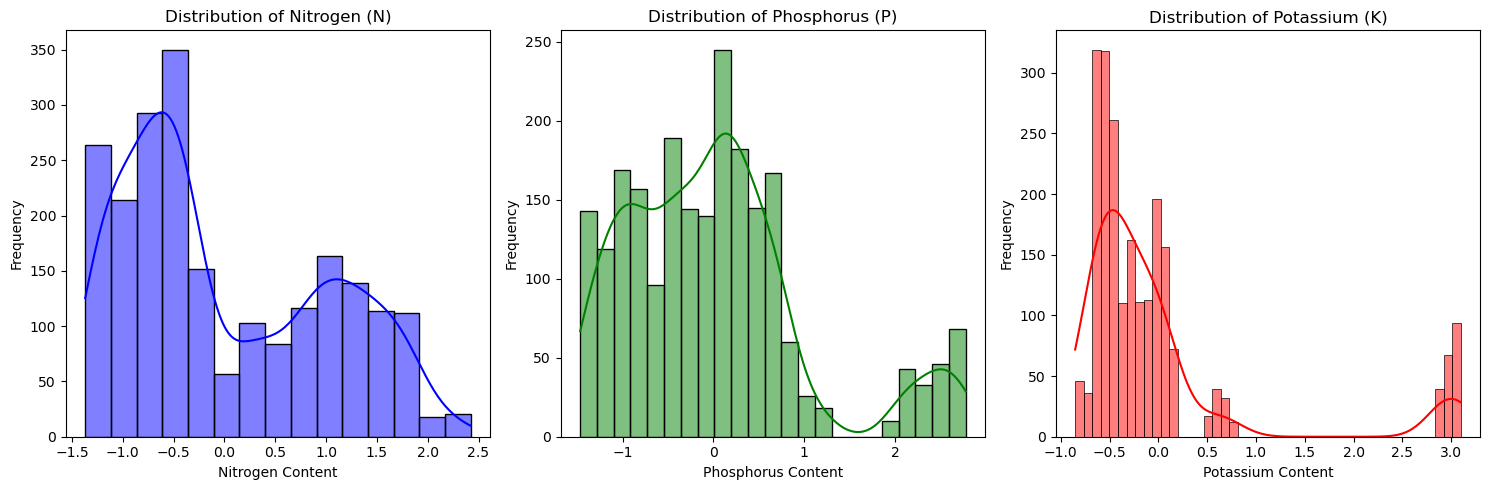

In [17]:
plt.figure(figsize=(15, 5))

# Nitrogen distribution
plt.subplot(1, 3, 1)
sns.histplot(data['N'], kde=True, color='blue')
plt.title('Distribution of Nitrogen (N)')
plt.xlabel('Nitrogen Content')
plt.ylabel('Frequency')

# Phosphorus distribution
plt.subplot(1, 3, 2)
sns.histplot(data['P'], kde=True, color='green')
plt.title('Distribution of Phosphorus (P)')
plt.xlabel('Phosphorus Content')
plt.ylabel('Frequency')

# Potassium distribution
plt.subplot(1, 3, 3)
sns.histplot(data['K'], kde=True, color='red')
plt.title('Distribution of Potassium (K)')
plt.xlabel('Potassium Content')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Relationship between Temperature and Humidity

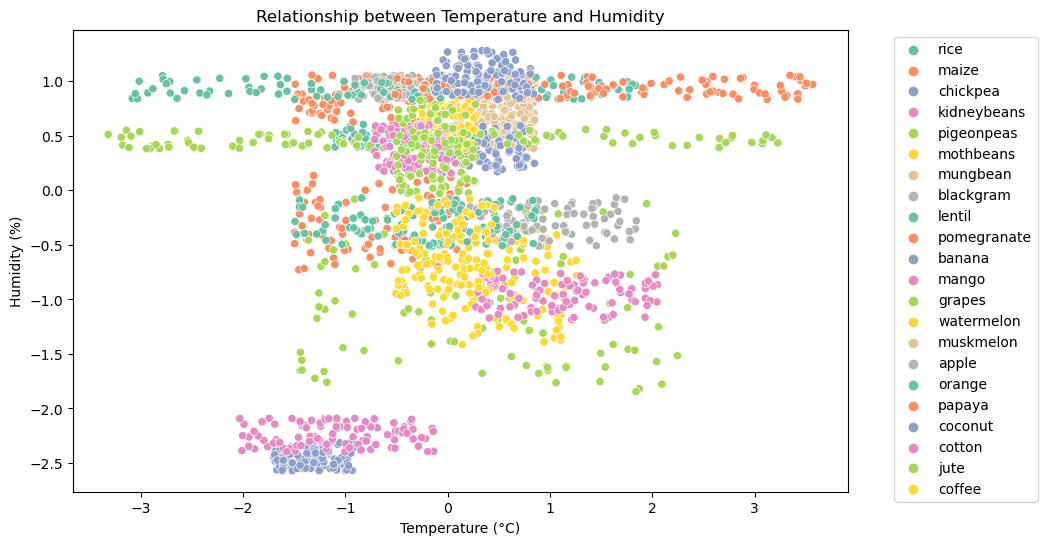

In [18]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='humidity', hue='label', data=data, palette='Set2')
plt.title('Relationship between Temperature and Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 3. Distribution of pH Levels

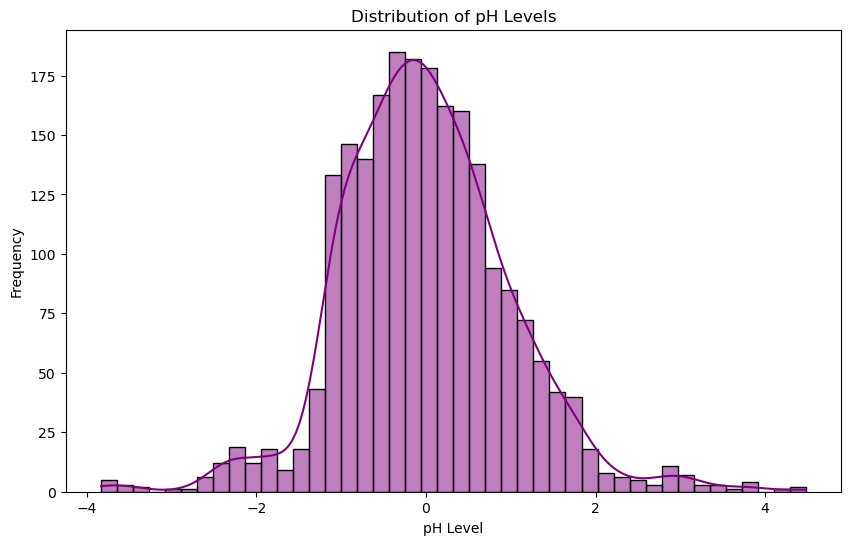

In [19]:
# Plot
plt.figure(figsize=(10, 6))
sns.histplot(data['ph'], kde=True, color='purple')
plt.title('Distribution of pH Levels')
plt.xlabel('pH Level')
plt.ylabel('Frequency')
plt.show()

# 4. Rainfall Distribution

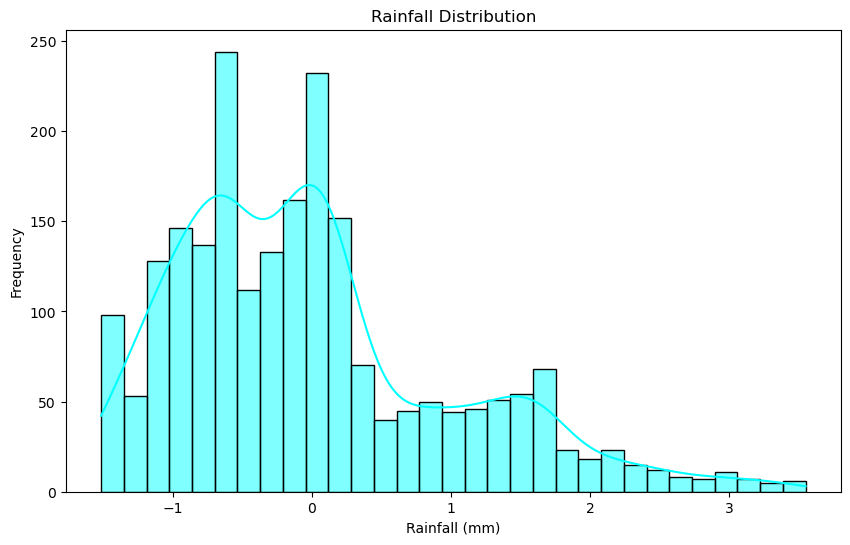

In [20]:
# Plot
plt.figure(figsize=(10, 6))
sns.histplot(data['rainfall'], kde=True, color='cyan')
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

# 5. Correlation Heatmap

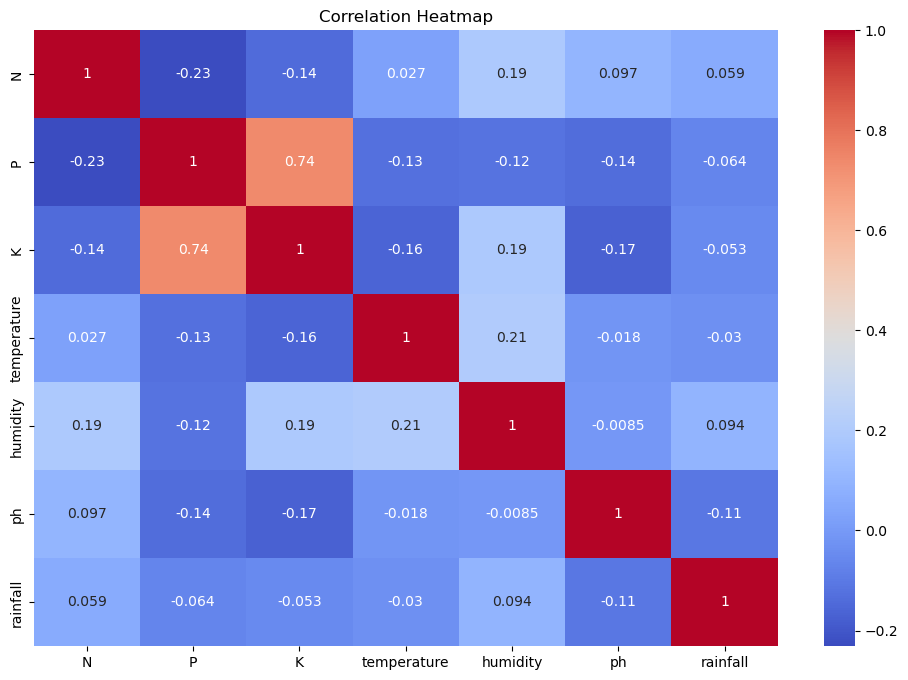

In [21]:
# Plot
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
# Import function
from sklearn.model_selection import train_test_split

# # Separate the features (X) from the target variable (y)
X = data.drop('label', axis=1)
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        1

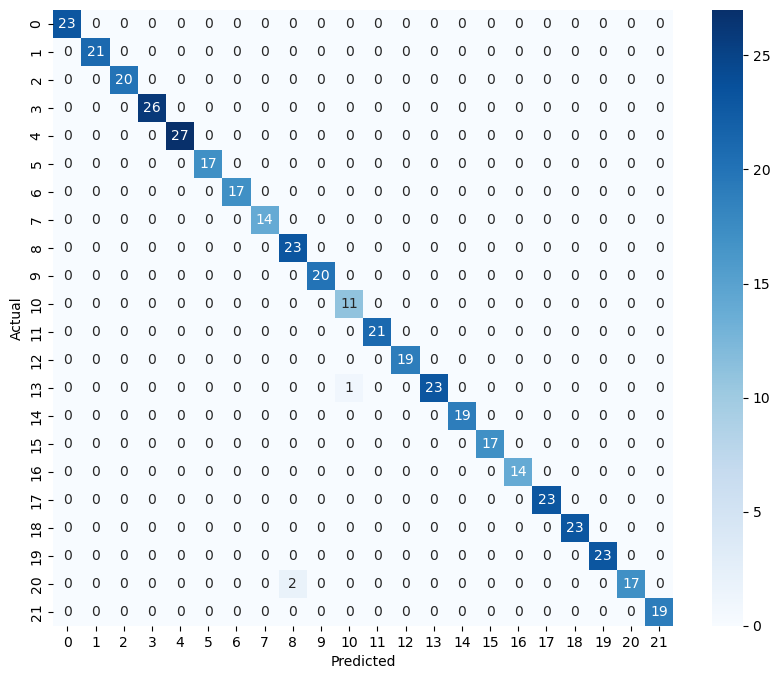

In [7]:
# Import function
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [8]:
# Import libraries & functions
import joblib
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Sample data for demonstration
X = np.random.rand(100, 7)
y = np.random.randint(0, 2, 100)

# Train the model
model = RandomForestClassifier()
model.fit(X, y)

# Save the model
joblib.dump(model, 'crop_recommendation_model.pkl')
print("Model saved successfully.")

Model saved successfully.


In [16]:
# Import libraries
import joblib
import numpy as np

# Load the model
model = joblib.load('crop_recommendation_model.pkl')

# Validation ranges and units
valid_ranges = {
    'N': (0, 100),  # Nitrogen level (percentage)
    'P': (0, 100),  # Phosphorus level (percentage)
    'K': (0, 100),  # Potassium level (percentage)
    'temperature': (-30, 50),  # Temperature in Celsius
    'humidity': (0, 100),  # Humidity in percentage
    'pH': (0, 14),  # pH level
    'rainfall': (0, 1000)  # Rainfall in mm
}

# Crop mapping
crop_mapping = {
    0: 'rice',
    1: 'maize',
    2: 'chickpea',
    3: 'kidneybeans',
    4: 'pigeonpeas',
    5: 'mothbeans',
    6: 'mungbean',
    7: 'blackgram',
    8: 'lentil',
    9: 'pomegranate',
    10: 'banana',
    11: 'mango',
    12: 'grapes',
    13: 'watermelon',
    14: 'muskmelon',
    15: 'apple',
    16: 'orange',
    17: 'papaya',
    18: 'coconut',
    19: 'cotton',
    20: 'jute',
    21: 'coffee'
}

def get_valid_input(prompt, key):
    while True:
        try:
            value = float(input(prompt))
            if valid_ranges[key][0] <= value <= valid_ranges[key][1]:
                return value
            else:
                print(f"Value out of range! Please enter a value between {valid_ranges[key][0]} and {valid_ranges[key][1]}.")
        except ValueError:
            print("Invalid input! Please enter a numeric value.")

# Function to make a prediction
def predict(features):
    features = np.array(features).reshape(1, -1)
    prediction = model.predict(features)
    return prediction[0]

# Main function to loop predictions
def main():
    while True:
        # Prompt user for input with validation
        N = get_valid_input(f"Enter Nitrogen level (N) in percentage [0-100%]: ", 'N')
        P = get_valid_input(f"Enter Phosphorus level (P) in percentage [0-100%]: ", 'P')
        K = get_valid_input(f"Enter Potassium level (K) in percentage [0-100%]: ", 'K')
        temperature = get_valid_input(f"Enter temperature in Celsius [-30-50°C]: ", 'temperature')
        humidity = get_valid_input(f"Enter humidity in percentage [0-100%]: ", 'humidity')
        pH = get_valid_input(f"Enter pH level [0-14]: ", 'pH')
        rainfall = get_valid_input(f"Enter rainfall in mm [0-1000 mm]: ", 'rainfall')

        # Create feature array
        features = [N, P, K, temperature, humidity, pH, rainfall]

        # Make prediction
        result = predict(features)
        crop_name = crop_mapping.get(result, "Unknown crop")
        print(f"Predicted Crop: {crop_name}")

        # Ask if the user wants to continue
        cont = input("Do you want to make another prediction? (yes/no): ").strip().lower()
        if cont != 'yes':
            break

if __name__ == '__main__':
    main()

Enter Nitrogen level (N) in percentage [0-100%]: 80
Enter Phosphorus level (P) in percentage [0-100%]: 65
Enter Potassium level (K) in percentage [0-100%]: 60
Enter temperature in Celsius [-30-50°C]: 20
Enter humidity in percentage [0-100%]: 60
Enter pH level [0-14]: 6.5
Enter rainfall in mm [0-1000 mm]: 300
Predicted Crop: rice
Do you want to make another prediction? (yes/no): yes
Enter Nitrogen level (N) in percentage [0-100%]: 50
Enter Phosphorus level (P) in percentage [0-100%]: 30
Enter Potassium level (K) in percentage [0-100%]: 33
Enter temperature in Celsius [-30-50°C]: 23
Enter humidity in percentage [0-100%]: 50
Enter pH level [0-14]: 4.5
Enter rainfall in mm [0-1000 mm]: 200
Predicted Crop: rice
Do you want to make another prediction? (yes/no): no
